## Part 1 Merging  Dataframes

Let's import the pandas

In [1]:
import pandas as pd

### 1.1 Creating Dataframes

Let's create the datafarmes

In [2]:
# 1- Orders Dataset
orders_data = {
    'Order_ID': [1, 2, 3, 4],
    'Spice_Name': ['Cinnamon', 'Turmeric', 'Cardamom', 'Nutmeg'],
    'Quantity': [5, 3, 4, 2]
}
orders_df = pd.DataFrame(orders_data)
orders_df

,Order_ID,Spice_Name,Quantity
0,1,Cinnamon,5
1,2,Turmeric,3
2,3,Cardamom,4
3,4,Nutmeg,2


In [3]:
# 2-Prices Dataset
prices_data = {
    'Spice_Name': ['Cinnamon', 'Turmeric', 'Cardamom', 'Saffron'],
    'Price_per_Unit': [2.5, 1.8, 3.0, 10.0]
}
prices_df = pd.DataFrame(prices_data)
prices_df


,Spice_Name,Price_per_Unit
0,Cinnamon,2.5
1,Turmeric,1.8
2,Cardamom,3.0
3,Saffron,10.0


In [4]:
# 3-Customer Info Dataset
customer_info_data = {
    'Order_ID': [1, 2, 3, 5],
    'Customer_Name': ['Sara', 'Alex', 'Hilal', 'Tanjina'],
    'Address': ['123 Spice St.', '456 Flavor Ave.', '789 Aroma Blvd.', '101 Scent Rd.']
}
customer_info_df = pd.DataFrame(customer_info_data)
customer_info_df

,Order_ID,Customer_Name,Address
0,1,Sara,123 Spice St.
1,2,Alex,456 Flavor Ave.
2,3,Hilal,789 Aroma Blvd.
3,5,Tanjina,101 Scent Rd.


In [5]:
# 4-Warehouse Info Dataset
warehouse_data = {
    'Order_ID': [1, 3, 4, 6],
    'Spice_Name': ['Cinnamon', 'Cardamom', 'Nutmeg', 'Paprika'],
    'Warehouse_Location': ['North', 'East', 'West', 'South'],
    'Stock_Available': [20, 30, 25, 15]
}
warehouse = pd.DataFrame(warehouse_data)
warehouse

,Order_ID,Spice_Name,Warehouse_Location,Stock_Available
0,1,Cinnamon,North,20
1,3,Cardamom,East,30
2,4,Nutmeg,West,25
3,6,Paprika,South,15


### 1.2 Merge Orders with Prices

In [6]:
# Merge Orders with Prices on 'Spice_Name'
#do a left merge
orders_prices_merged = pd.merge(orders_df, prices_df, on='Spice_Name', how='left')

orders_prices_merged

,Order_ID,Spice_Name,Quantity,Price_per_Unit
0,1,Cinnamon,5,2.5
1,2,Turmeric,3,1.8
2,3,Cardamom,4,3.0
3,4,Nutmeg,2,NaN


In the `orders_prices_merged` DataFrame, NaN values appear because the `Orders Dataset` includes spices like "Nutmeg" that are not listed in the Prices Dataset. We used a left merge on `Spice_Name`, meaning all rows from the `Orders Dataset` are kept, and corresponding rows from the `Prices Dataset` are included where matches are found; otherwise, NaN values are inserted. This shows how left merges retain all entries from the left DataFrame even if no corresponding entries exist in the right DataFrame.

In [7]:
# Merge Orders with Customer Info on 'Order_ID'
orders_customers_merged = pd.merge(orders_df, customer_info_df, on='Order_ID', how='left')
orders_customers_merged


,Order_ID,Spice_Name,Quantity,Customer_Name,Address
0,1,Cinnamon,5,Sara,123 Spice St.
1,2,Turmeric,3,Alex,456 Flavor Ave.
2,3,Cardamom,4,Hilal,789 Aroma Blvd.
3,4,Nutmeg,2,NaN,NaN


In the `orders_customers_merged` DataFrame, NaN values appear because the `Orders Dataset` contains an Order_ID column that is not listed in the `Customer Info Dataset`. Same thing happened as in the first merge

In [8]:
# Merge Orders with Warehouse Info on 'Spice_Name' only
orders_warehouse_merged = pd.merge(orders_df, warehouse, on='Spice_Name', how='left')

orders_warehouse_merged


,Order_ID_x,Spice_Name,Quantity,Order_ID_y,Warehouse_Location,Stock_Available
0,1,Cinnamon,5,1.0,North,20.0
1,2,Turmeric,3,NaN,NaN,NaN
2,3,Cardamom,4,3.0,East,30.0
3,4,Nutmeg,2,4.0,West,25.0


In [9]:
# Inner Merge Orders with Prices on 'Spice_Name'
orders_prices_inner = pd.merge(orders_df, prices_df, on='Spice_Name', how='inner')

orders_prices_inner


,Order_ID,Spice_Name,Quantity,Price_per_Unit
0,1,Cinnamon,5,2.5
1,2,Turmeric,3,1.8
2,3,Cardamom,4,3.0


An inner merge only includes rows where the merge key (Spice_Name) is present in both dataframes. Therefore, only orders with spices that are listed in both the `Orders Dataset` and the `Prices` Dataset are included. Any orders with spices not listed in the `Prices` Dataset (like "Nutmeg") are excluded.

In [11]:
# Inner Merge Orders with Customer Info on 'Order_ID'
orders_customers_inner = pd.merge(orders_df, customer_info_df, on='Order_ID', how='inner')
orders_customers_inner

,Order_ID,Spice_Name,Quantity,Customer_Name,Address
0,1,Cinnamon,5,Sara,123 Spice St.
1,2,Turmeric,3,Alex,456 Flavor Ave.
2,3,Cardamom,4,Hilal,789 Aroma Blvd.


Same logic. Only orders that have corresponding customer information in the `Customer Info Dataset` are included. Orders with Order_ID not listed in the `Customer Info` Dataset (like Order_ID 4) are excluded.

In [12]:
# Outer Merge Orders with Prices on 'Spice_Name'
orders_prices_outer = pd.merge(orders_df, prices_df, on='Spice_Name', how='outer')
orders_prices_outer


,Order_ID,Spice_Name,Quantity,Price_per_Unit
0,3.0,Cardamom,4.0,3.0
1,1.0,Cinnamon,5.0,2.5
2,4.0,Nutmeg,2.0,NaN
3,NaN,Saffron,NaN,10.0
4,2.0,Turmeric,3.0,1.8


An outer merge includes all rows from both dataframes, regardless of whether the merge key (Spice_Name) is present in both. If a row in one dataframe doesn't have a matching row in the other, NaN values are used for the missing entries. 

In [13]:
# Outer Merge Orders with Customer Info on 'Order_ID'
orders_customers_outer = pd.merge(orders_df, customer_info_df, on='Order_ID', how='outer')

orders_customers_outer

,Order_ID,Spice_Name,Quantity,Customer_Name,Address
0,1,Cinnamon,5.0,Sara,123 Spice St.
1,2,Turmeric,3.0,Alex,456 Flavor Ave.
2,3,Cardamom,4.0,Hilal,789 Aroma Blvd.
3,4,Nutmeg,2.0,NaN,NaN
4,5,NaN,NaN,Tanjina,101 Scent Rd.


In [23]:
# Concatenate Orders and Customer Info Vertically
concat_vertical = pd.concat([orders_df, customer_info_df], ignore_index=True, sort=False)
concat_vertical

,Order_ID,Spice_Name,Quantity,Customer_Name,Address
0,1,Cinnamon,5.0,NaN,NaN
1,2,Turmeric,3.0,NaN,NaN
2,3,Cardamom,4.0,NaN,NaN
3,4,Nutmeg,2.0,NaN,NaN
4,1,NaN,NaN,Sara,123 Spice St.
5,2,NaN,NaN,Alex,456 Flavor Ave.
6,3,NaN,NaN,Hilal,789 Aroma Blvd.
7,5,NaN,NaN,Tanjina,101 Scent Rd.


## Part 2 Pivot table and aggregate

In [15]:
# let's remember orders_df
orders_df

,Order_ID,Spice_Name,Quantity
0,1,Cinnamon,5
1,2,Turmeric,3
2,3,Cardamom,4
3,4,Nutmeg,2


In [26]:
new_row = {'Order_ID':5,'Spice_Name':'Cinnamon','Quantity':4}
orders_df.loc[4] = new_row
orders_df

,Order_ID,Spice_Name,Quantity
0,1,Cinnamon,5
1,2,Turmeric,3
2,3,Cardamom,4
3,4,Nutmeg,2
4,5,Cinnamon,4


In [27]:
# Pivot table for count of each spice
pivot_count = orders_df.pivot_table(values='Quantity', index='Spice_Name',aggfunc='count')
pivot_count.rename(columns={'Quantity': 'Count'}, inplace=True) #to not o get confused with quantity column
pivot_count

,Count
Spice_Name,
Cardamom,1
Cinnamon,2
Nutmeg,1
Turmeric,1


In [28]:
# Pivot table for mean quantity ordered for each spice
pivot_mean = orders_df.pivot_table(values='Quantity', index='Spice_Name', aggfunc='mean')
pivot_mean.rename(columns={'Quantity': 'Mean_Quantity'}, inplace=True)
pivot_mean

,Mean_Quantity
Spice_Name,
Cardamom,4.0
Cinnamon,4.5
Nutmeg,2.0
Turmeric,3.0


In [29]:
#let's try it with groupby
mean_quantity = orders_df.groupby('Spice_Name')['Quantity'].mean().reset_index(name='Mean_Quantity')
mean_quantity

,Spice_Name,Mean_Quantity
0,Cardamom,4.0
1,Cinnamon,4.5
2,Nutmeg,2.0
3,Turmeric,3.0


Pivot tables are powerful for summarizing data in tabular form, however for hese purposes groupby is a better option for performing aggregations.

## Part 3 Coin Flips

Simulate a fair coin flip for 10 times and calculate the estimated probability of getting a head (number of times you got a head divided by 10). Repeat for 100, 1000 and 10000 times. How does the estimated probability changes ? How can we interpret that ?

In [42]:
import numpy as np
import seaborn as sns
# Simulation Setup: The code simulates 10 coin flips (size=10) repeated 10,000 times (k = 10000)

number_of_heads = []  
k = 100

#For each simulation, np.random.random(size=10) generates an array of 10 random numbers between 0 and 1. 
#flips = np.random.random(size=10) > 0.5 converts these random numbers into boolean values.
for i in range(k):
    heads = np.random.random(size=10) > 0.5
    number_of_heads.append(np.sum(heads))

# Convert the list of head counts to a numpy array for easier manipulation
number_of_heads = np.array(number_of_heads)

# Calculate the estimated probability of getting heads
estimated_probabilities = number_of_heads / 10
estimated_probabilities

array([0.2, 0.4, 0.6, 0.6, 0.5, 0.4, 0.8, 0.3, 0.7, 0.4, 0.5, 0.7, 0.5,
       0.3, 0.5, 0.7, 0.2, 0.4, 0.3, 0.7, 0.5, 0.6, 0.4, 0.6, 0.7, 0.4,
       0.3, 0.4, 0.5, 0.5, 0.3, 0.3, 0.5, 0.2, 0.4, 0.4, 0.4, 0.5, 0.1,
       0.5, 0.6, 0.6, 0.1, 0.6, 0.7, 0.7, 0.7, 0.6, 0.6, 0.7, 0.7, 0.9,
       0.4, 0.8, 0.5, 0.6, 0.4, 0.5, 0.5, 0.6, 0.7, 0.6, 0.5, 0.4, 0.4,
       0.6, 0.6, 0.7, 0.6, 0.7, 0.5, 0.6, 0.4, 0.6, 0.6, 0.3, 0.5, 0.6,
       0.5, 0.3, 0.5, 0.3, 0.4, 0.6, 0.3, 0.5, 0.8, 0.4, 0.6, 0.6, 0.3,
       0.9, 0.3, 0.3, 0.5, 0.8, 0.5, 0.7, 0.3, 0.5])

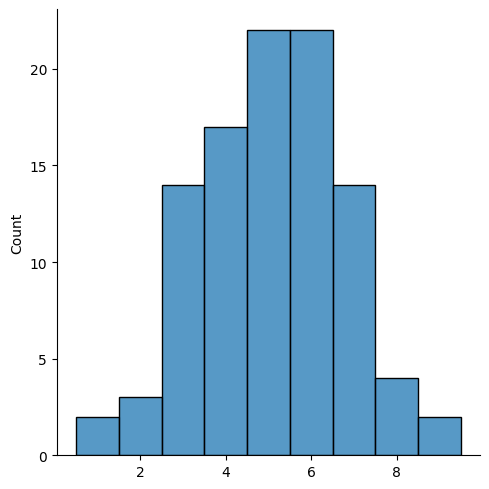

In [43]:
#let's make a plot
sns.displot(number_of_heads, bins=11, discrete=True);

In [44]:
number_of_heads = []  
k = 10000

#For each simulation, np.random.random(size=10) generates an array of 10 random numbers between 0 and 1. 
#flips = np.random.random(size=10) > 0.5 converts these random numbers into boolean values.
for i in range(k):
    heads = np.random.random(size=10) > 0.5
    number_of_heads.append(np.sum(heads))
# Convert the list of head counts to a numpy array for easier manipulation
number_of_heads = np.array(number_of_heads)

# Calculate the estimated probability of getting heads
estimated_probabilities = number_of_heads / 10
estimated_probabilities

array([0.7, 0.6, 0.5, ..., 0.3, 0.4, 0.6])

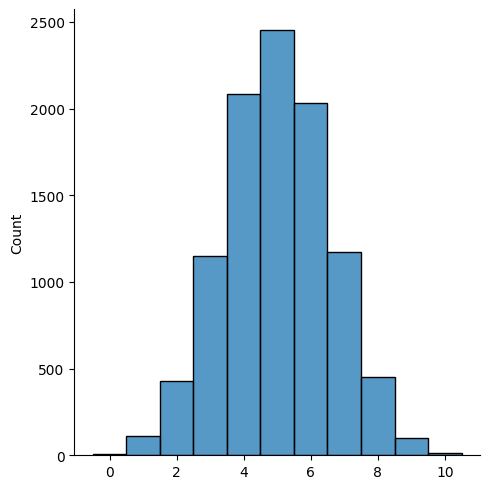

In [45]:
#let's make a plot
sns.displot(number_of_heads, bins=11, discrete=True);

As the number of trials increases, the mean estimated probability converges towards the true probability of 0.5.
Standard deviation decreases with more trials, indicating more precise and reliable estimates.

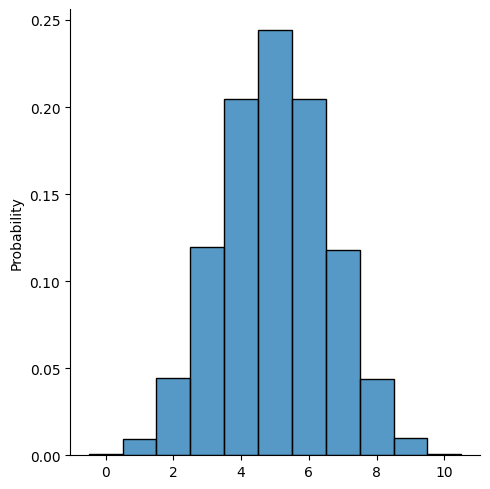

In [48]:
# Parameters of the Binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success (getting a 'head')

# Sample from the Binomial distribution
samples = np.random.binomial(n, p, size=100_000)
#Generates 100,000 samples from a Binomial distribution with parameters 


# plotting the pmf using the samples
n_tails = pd.Series(samples)
sns.displot(n_tails, discrete=True, stat="probability");

In [47]:
samples

array([6, 3, 5, ..., 6, 6, 7], dtype=int32)

In [51]:
import numpy as np
import pandas as pd

# 定义一个离散随机变量，假设掷一个六面骰子
dice_rolls = np.random.randint(1, 7, size=1000)

# 将结果转换为pandas DataFrame
df = pd.DataFrame(dice_rolls, columns=['Dice Roll'])

# 计算每个值的频率
frequency = df['Dice Roll'].value_counts().sort_index()

# 计算每个值的概率
probability = frequency / len(df)

print(probability)


Dice Roll
1    0.185
2    0.176
3    0.169
4    0.159
5    0.150
6    0.161
Name: count, dtype: float64


In [54]:
df['Dice Roll'].value_counts().sort_index()

Dice Roll
1    185
2    176
3    169
4    159
5    150
6    161
Name: count, dtype: int64